<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/11-Data%20Preprocessing/Statistical_Thinking_Normality_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
%matplotlib inline

In [6]:
marketing_df=pd.read_csv("https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/marketing_cva_f.csv")

In [7]:
marketing_df.head()

Customer       State  ...  Vehicle_Class avg_vehicle_age
0  BU79786  Washington  ...   Two-Door Car       40.696695
1  AI49188      Nevada  ...   Two-Door Car       48.755298
2  HB64268  Washington  ...  Four-Door Car       70.394474
3  OC83172      Oregon  ...   Two-Door Car       53.460212
4  XZ87318      Oregon  ...  Four-Door Car       32.811507

[5 rows x 12 columns]

In [8]:
marketing_df.tail()

Customer       State  ...  Vehicle_Class avg_vehicle_age
6812  TF56202  California  ...   Two-Door Car       37.492591
6813  YM19146  California  ...  Four-Door Car       48.946675
6814  LA72316  California  ...  Four-Door Car       65.310053
6815  PK87824  California  ...  Four-Door Car       48.002914
6816  UP19263  California  ...  Four-Door Car       45.151858

[5 rows x 12 columns]

In [9]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       6817 non-null   object 
 1   State                          6817 non-null   object 
 2   CLV                            6817 non-null   float64
 3   Coverage                       6817 non-null   object 
 4   Income                         6817 non-null   int64  
 5   loc_type                       6817 non-null   object 
 6   monthly_premium                6817 non-null   int64  
 7   months_last_claim              6817 non-null   int64  
 8   Months_Since_Policy_Inception  6817 non-null   int64  
 9   Total_Claim_Amount             6817 non-null   float64
 10  Vehicle_Class                  6817 non-null   object 
 11  avg_vehicle_age                6817 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage:

In [10]:
print("Rows                   :", marketing_df.shape[0])
print("Columns                :", marketing_df.shape[1])
print("\nFeatures             :" ,marketing_df.columns.tolist())
print("\nMissing Values       :",marketing_df.isnull().any())

Rows                   : 6817
Columns                : 12

Features             : ['Customer', 'State', 'CLV', 'Coverage', 'Income', 'loc_type', 'monthly_premium', 'months_last_claim', 'Months_Since_Policy_Inception', 'Total_Claim_Amount', 'Vehicle_Class', 'avg_vehicle_age']

Missing Values       : Customer                         False
State                            False
CLV                              False
Coverage                         False
Income                           False
loc_type                         False
monthly_premium                  False
months_last_claim                False
Months_Since_Policy_Inception    False
Total_Claim_Amount               False
Vehicle_Class                    False
avg_vehicle_age                  False
dtype: bool


In [11]:
marketing_df.describe()

CLV        Income  ...  Total_Claim_Amount  avg_vehicle_age
count   6817.000000   6817.000000  ...         6817.000000      6817.000000
mean    8130.229340  50456.580461  ...          377.840789        50.126257
std     6949.067972  24305.956566  ...          252.648952         9.919767
min     2119.894333  10037.000000  ...            0.099007        11.875974
25%     4090.750678  28432.000000  ...          210.100003        43.449925
50%     5810.630529  48081.000000  ...          340.800000        50.100924
75%     9075.768214  70187.000000  ...          498.612632        56.877234
max    83325.381190  99981.000000  ...         2893.239678        83.387485

[8 rows x 7 columns]

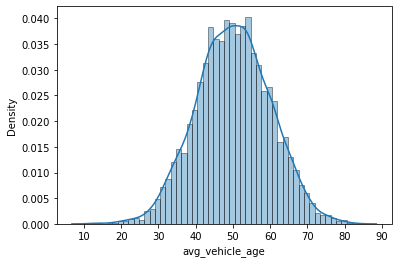

In [15]:
sns.distplot(marketing_df['avg_vehicle_age'],hist=True,hist_kws=dict(ec="k"))

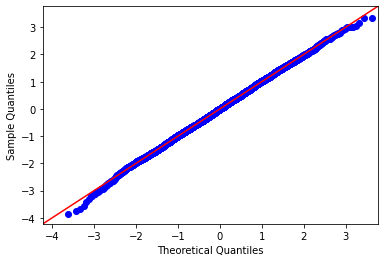

In [17]:
plot=sm.qqplot(marketing_df['avg_vehicle_age'],line="45",fit=True)

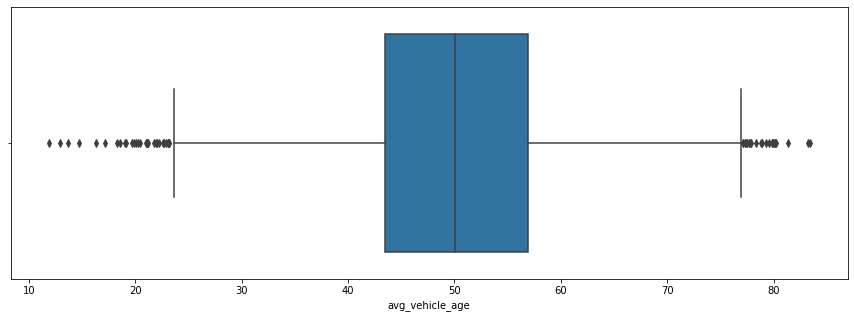

In [18]:
plt.figure(figsize=(15,5))
sns.boxplot(x="avg_vehicle_age",data=marketing_df)

In [19]:
chi2,p = stats.normaltest(marketing_df['avg_vehicle_age'])
print('Chi2 =%.2f,pvalue =%.3f'%(chi2,p))

Chi2 =1.04,pvalue =0.593


In [20]:
stats.anderson(marketing_df['avg_vehicle_age'],dist='norm')

AndersonResult(statistic=0.38327277704684093, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [21]:
from scipy import stats
_,l =stats.boxcox(marketing_df['avg_vehicle_age'])

In [30]:
print("lambda          :",l)

lambda          : 0.44437538279540056


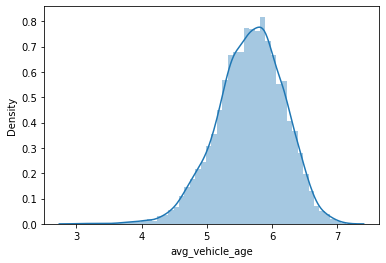

In [31]:
sns.distplot(marketing_df['avg_vehicle_age'].apply(lambda x:np.power(x,l)),hist=True)

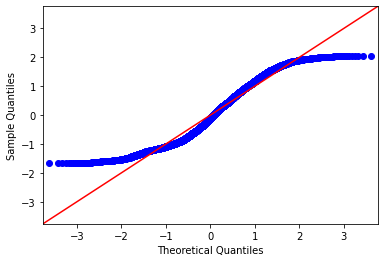

In [25]:
plot=sm.qqplot(marketing_df['Income'],line="45",fit=True)

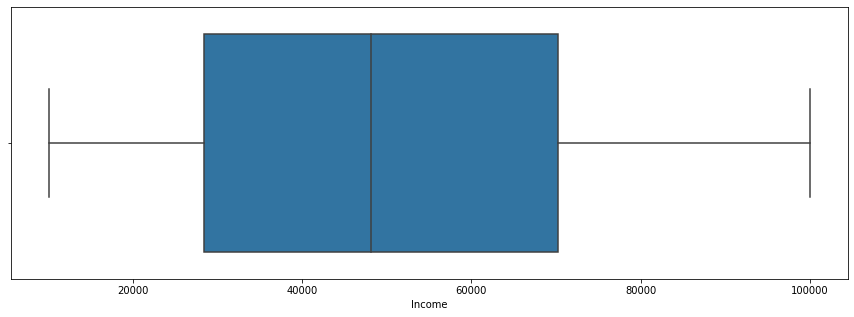

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Income",data=marketing_df)

In [27]:
_,l =stats.boxcox(marketing_df['Income'])

In [28]:
print("lambda          :",l)

lambda          : 0.44437538279540056


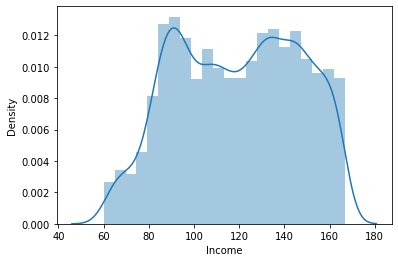

In [29]:
sns.distplot(marketing_df['Income'].apply(lambda x:np.power(x,l)),hist=True)

In [33]:
stats.boxcox(marketing_df['Income'].apply(lambda x:np.power(x,l)))

(array([128.09819109, 120.14015208, 114.53556654, ..., 142.98627724,
         83.36466029,  83.94694497]), 1.0000001881629772)

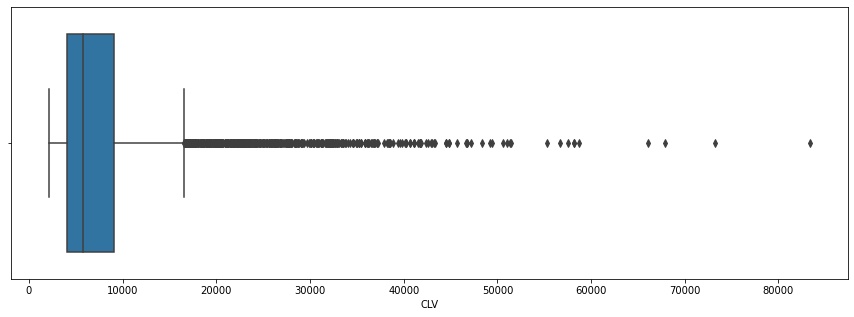

In [34]:
plt.figure(figsize=(15,5))
sns.boxplot(x="CLV",data=marketing_df)

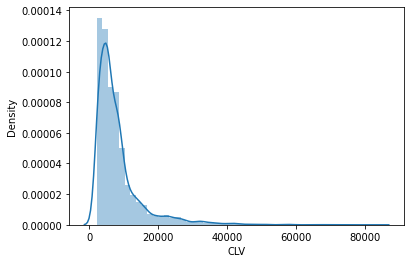

In [42]:
sns.distplot(marketing_df['CLV'],hist=True)

In [36]:
_,l =stats.boxcox(marketing_df['CLV'])

In [37]:
print("lambda          :",l)

lambda          : -0.3628046005612987


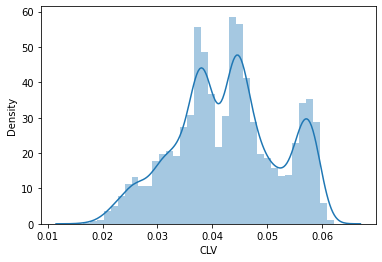

In [40]:
sns.distplot(marketing_df['CLV'].apply(lambda x:1/np.power(x,np.abs(l))),hist=True)

In [41]:
stats.boxcox(marketing_df['CLV'].apply(lambda x:1/np.power(x,np.abs(l))))

(array([-0.94358158, -0.96772907, -0.94394867, ..., -0.97401118,
        -0.94586294, -0.96077198]), 0.9999998972585702)

Common Box-Cox Transformations

Lambda value (λ)	Transformed data (Y’)

-3	Y-3 = 1/Y3

-2	Y-2 = 1/SQUARE(input)

-1	Y-1 = 1/(input)

-0.5	Y-0.5 = 1/(√(Y))  i.e1/SQRT(input)

0	log(Y)**   i.e input

0.5	Y0.5 = √(Y)  i.e 1/SQRT(input)

1	Y1 = Y

2	Y2

3	Y3
